In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:10<00:00, 76.7MB/s]
100% 1.06G/1.06G [00:10<00:00, 108MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.imagenet_utils import preprocess_input

Generators

In [135]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalize the images in the np array

In [137]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Model

In [10]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [12]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 81s 112ms/step - loss: 1.3605 - accuracy: 0.5404 - val_loss: 0.6594 - val_accuracy: 0.6198
Epoch 2/20
625/625 [==============================] - 70s 112ms/step - loss: 0.6365 - accuracy: 0.6364 - val_loss: 0.5755 - val_accuracy: 0.7058
Epoch 3/20
625/625 [==============================] - 69s 109ms/step - loss: 0.5707 - accuracy: 0.7116 - val_loss: 0.5353 - val_accuracy: 0.7250
Epoch 4/20
625/625 [==============================] - 71s 113ms/step - loss: 0.5094 - accuracy: 0.7599 - val_loss: 0.5728 - val_accuracy: 0.7146
Epoch 5/20
625/625 [==============================] - 68s 108ms/step - loss: 0.4467 - accuracy: 0.8005 - val_loss: 0.4953 - val_accuracy: 0.7720
Epoch 6/20
625/625 [==============================] - 68s 108ms/step - loss: 0.3817 - accuracy: 0.8327 - val_loss: 0.6615 - val_accuracy: 0.7640
Epoch 7/20
625/625 [==============================] - 67s 107ms/step - loss: 0.3158 - accuracy: 0.8691 - val_loss: 0.4358 - val_ac

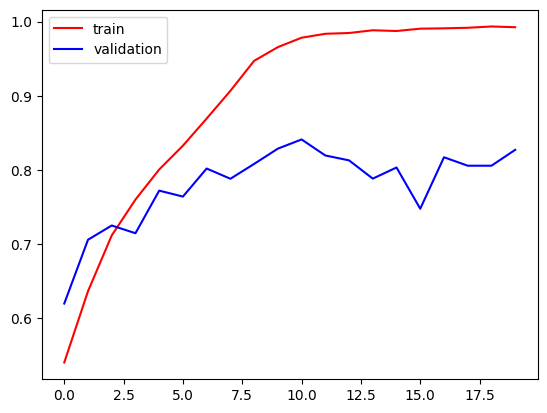

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

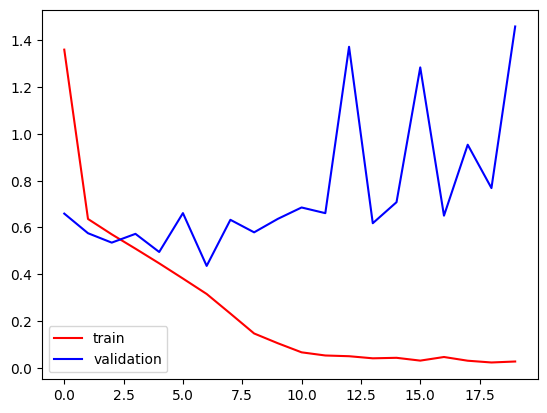

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
model.save('catdog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [140]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/dog.jpeg',target_size=(256,256))

In [91]:
import numpy as np

In [141]:
x=image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x=x/255.
x

array([[[[0.52156866, 0.45490196, 0.38431373],
         [0.49411765, 0.43529412, 0.36078432],
         [0.5058824 , 0.44705883, 0.37254903],
         ...,
         [0.39607844, 0.33333334, 0.28235295],
         [0.3882353 , 0.3254902 , 0.27450982],
         [0.37254903, 0.31764707, 0.26666668]],

        [[0.5137255 , 0.45490196, 0.38039216],
         [0.49803922, 0.4392157 , 0.3647059 ],
         [0.5019608 , 0.44313726, 0.36862746],
         ...,
         [0.39607844, 0.33333334, 0.28235295],
         [0.38431373, 0.32941177, 0.2784314 ],
         [0.37254903, 0.31764707, 0.26666668]],

        [[0.5058824 , 0.44705883, 0.37254903],
         [0.49803922, 0.4392157 , 0.3647059 ],
         [0.49411765, 0.43529412, 0.36078432],
         ...,
         [0.39607844, 0.33333334, 0.28235295],
         [0.38431373, 0.32941177, 0.2784314 ],
         [0.37254903, 0.31764707, 0.26666668]],

        ...,

        [[0.3882353 , 0.3137255 , 0.25490198],
         [0.3882353 , 0.3137255 , 0.25490198]

In [143]:
y = model.predict(x)
y[0][0]


1/1 [==============================] - 0s 19ms/step


array([[0.99277663]], dtype=float32)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_dir = '/content/train'
validation_data_dir = '/content/test'
nb_train_samples = 20000
nb_validation_samples = 5000
epochs=20
batch_size=32
image_size=(256,256)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)


history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stop]
    )

Epoch 1/20
625/625 [==============================] - 335s 522ms/step - loss: 1.6600 - accuracy: 0.5778 - val_loss: 0.6384 - val_accuracy: 0.6472
Epoch 2/20
625/625 [==============================] - 328s 525ms/step - loss: 0.6179 - accuracy: 0.6704 - val_loss: 0.5818 - val_accuracy: 0.6841
Epoch 3/20
625/625 [==============================] - 323s 517ms/step - loss: 0.5657 - accuracy: 0.7142 - val_loss: 0.5997 - val_accuracy: 0.6486
Epoch 4/20
625/625 [==============================] - 336s 537ms/step - loss: 0.4994 - accuracy: 0.7591 - val_loss: 0.5224 - val_accuracy: 0.7426
Epoch 5/20
625/625 [==============================] - 328s 524ms/step - loss: 0.4574 - accuracy: 0.7853 - val_loss: 0.5257 - val_accuracy: 0.7408
Epoch 6/20
625/625 [==============================] - 321s 514ms/step - loss: 0.4355 - accuracy: 0.8040 - val_loss: 0.5606 - val_accuracy: 0.7208
Epoch 7/20
625/625 [==============================] - 321s 513ms/step - loss: 0.3937 - accuracy: 0.8258 - val_loss: 0.4670 -

Before increasing epochs

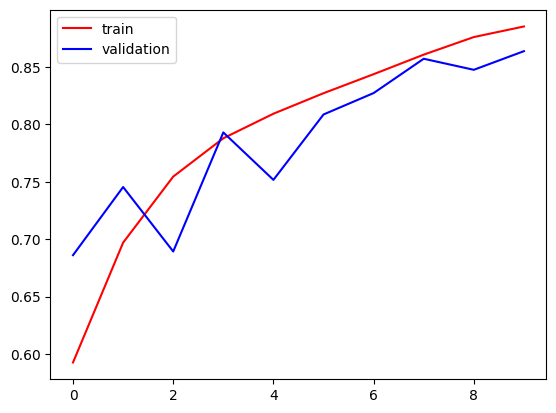

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

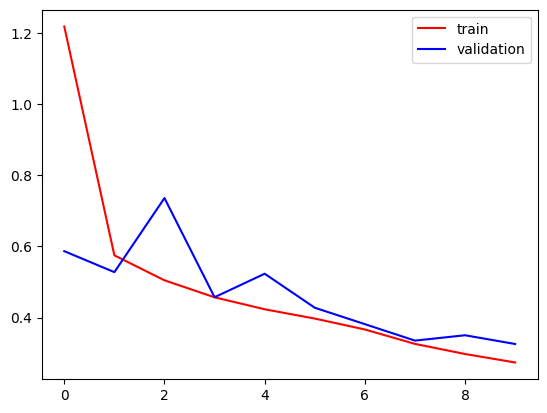

In [ ]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

After increasing epochs

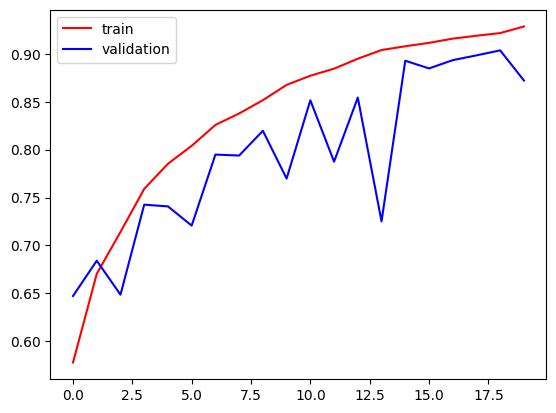

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

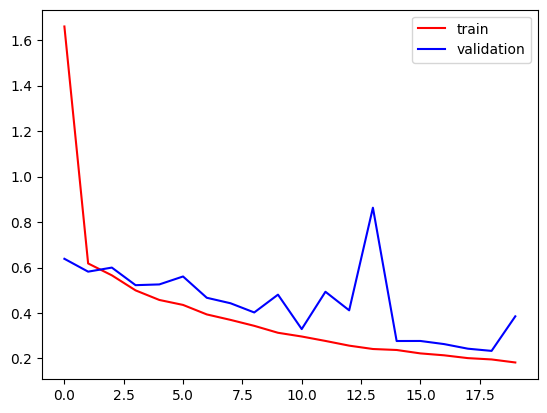

In [ ]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()